# EDA 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read in data and drop last 4 rows since not apart of data set

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/downloaded_school_data.csv', skiprows=5, na_values=['†', '-', '‡']) 
df.drop(df.tail(4).index,inplace=True) 
df.head()

/opt/miniconda3/envs/py38ML/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,School Name,State Name [Public School] Latest available year,State Name [Public School] 2017-18,State Name [Public School] 2016-17,State Name [Public School] 2015-16,State Name [Public School] 2014-15,State Name [Public School] 2013-14,State Name [Public School] 2012-13,State Name [Public School] 2011-12,State Name [Public School] 2010-11,State Name [Public School] 2009-10,State Name [Public School] 2008-09,County Name [Public School] 2017-18,County Name [Public School] 2016-17,County Name [Public School] 2015-16,County Name [Public School] 2014-15,County Name [Public School] 2013-14,County Name [Public School] 2012-13,County Name [Public School] 2011-12,County Name [Public School] 2010-11,County Name [Public School] 2009-10,County Name [Public School] 2008-09,Title I Eligible School [Public School] 2017-18,Title I Eligible School [Public School] 2016-17,Title I Eligible School [Public School] 2015-16,Title I Eligible School [Public School] 2014-15,Title I Eligible School [Public School] 2013-14,Title I Eligible School [Public School] 2012-13,Title I Eligible School [Public School] 2011-12,Title I Eligible School [Public School] 2010-11,Title I Eligible School [Public School] 2009-10,Title I Eligible School [Public School] 2008-09,Total Students All Grades (Excludes AE) [Public School] 2017-18,Total Students All Grades (Excludes AE) [Public School] 2016-17,Total Students All Grades (Excludes AE) [Public School] 2015-16,Total Students All Grades (Excludes AE) [Public School] 2014-15,Total Students All Grades (Excludes AE) [Public School] 2013-14,Total Students All Grades (Excludes AE) [Public School] 2012-13,Total Students All Grades (Excludes AE) [Public School] 2011-12,Total Students All Grades (Excludes AE) [Public School] 2010-11,Total Students All Grades (Excludes AE) [Public School] 2009-10,Total Students All Grades (Excludes AE) [Public School] 2008-09,Reduced-price Lunch Eligible Students [Public School] 2017-18,Reduced-price Lunch Eligible Students [Public School] 2016-17,Reduced-price Lunch Eligible Students [Public School] 2015-16,Reduced-price Lunch Eligible Students [Public School] 2014-15,Reduced-price Lunch Eligible Students [Public School] 2013-14,Reduced-price Lunch Eligible Students [Public School] 2012-13,Reduced-price Lunch Eligible Students [Public School] 2011-12,Reduced-price Lunch Eligible Students [Public School] 2010-11,Reduced-price Lunch Eligible Students [Public School] 2009-10,Reduced-price Lunch Eligible Students [Public School] 2008-09
0,21ST CENTURY EARLY LEARNING FOUNDATIONS ACADEMY,TEXAS,TEXAS,TEXAS,TEXAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo County,Hidalgo County,Hidalgo County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-Yes,1-Yes,2-No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331,303,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"=""0""","=""0""","=""0""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3D ACADEMY,Texas,TEXAS,TEXAS,TEXAS,TEXAS,Texas,Texas,Texas,Texas,Texas,TEXAS,Hidalgo County,Hidalgo County,Hidalgo County,HIDALGO COUNTY,HIDALGO COUNTY,HIDALGO COUNTY,HIDALGO COUNTY,HIDALGO COUNTY,HIDALGO COUNTY,HIDALGO COUNTY,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,2-No,142,161,179,87,105,137,102,122,127,114,"=""0""","=""0""","=""0""","=""0""",2,3,4,4,4,4
2,3RD H S,Texas,TEXAS,TEXAS,TEXAS,TEXAS,Texas,Texas,Texas,Texas,Texas,NaN,Collin County,Collin County,Collin County,COLLIN COUNTY,COLLIN COUNTY,COLLIN COUNTY,COLLIN COUNTY,COLLIN COUNTY,COLLIN COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"=""0""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6TH GRADE CENTER,Texas,TEXAS,TEXAS,TEXAS,TEXAS,Texas,Texas,Texas,Texas,Texas,TEXAS,Hunt County,Hunt County,Hunt County,HUNT COUNTY,HUNT COUNTY,HUNT COUNTY,HUNT COUNTY,HUNT COUNTY,HUNT COUNTY,HUNT COUNTY,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,1-Yes,370,376,370,318,359,356,309,378,328,308,32,28,25,32,31,23,29,25,36,28
4,7TH AND 8TH GRADE ACADEMY,Oklahoma,OKLAHOMA,OKLAHOMA,OKLAHOMA,OKLAHOMA,Oklahoma,Oklahoma,Oklahoma,Oklahoma,Oklahoma,OKLAHOMA,Muskoge

### Removed redundant columns

In [3]:
cols_to_drop = ['State Name [Public School] 2017-18', 'State Name [Public School] 2016-17', 'State Name [Public School] 2015-16',
               'State Name [Public School] 2014-15', 'State Name [Public School] 2013-14', 'State Name [Public School] 2012-13',
               'State Name [Public School] 2011-12', 'State Name [Public School] 2010-11', 'State Name [Public School] 2009-10',
               'State Name [Public School] 2008-09', 
               'County Name [Public School] 2016-17', 'County Name [Public School] 2015-16', 'County Name [Public School] 2014-15',
               'County Name [Public School] 2013-14', 'County Name [Public School] 2012-13', 'County Name [Public School] 2011-12',
               'County Name [Public School] 2010-11', 'County Name [Public School] 2009-10', 'County Name [Public School] 2008-09']
df.drop(cols_to_drop, axis=1, inplace=True)

### Change names of columns for ease of use

In [4]:
df.rename(columns={"State Name [Public School] Latest available year": "State", "County Name [Public School] 2017-18": "County"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16845 entries, 0 to 16844
Data columns (total 33 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   School Name                                                      16845 non-null  object
 1   State                                                            16845 non-null  object
 2   County                                                           14481 non-null  object
 3   Title I Eligible School [Public School] 2017-18                  13867 non-null  object
 4   Title I Eligible School [Public School] 2016-17                  13852 non-null  object
 5   Title I Eligible School [Public School] 2015-16                  13794 non-null  object
 6   Title I Eligible School [Public School] 2014-15                  13783 non-null  object
 7   Title I Eligible School [Public School] 2013-14  

 ### Using a dict to organize dataframes by year

In [6]:
dates_df = {}
for i in range(10):
    new_df = df[['School Name','State','County']]
    new_df['total_students'] = df[df.columns[13+i]].values
    new_df['reduced_price'] = df[df.columns[23+i]].values
    new_df['title_I'] = df[df.columns[3+i]].values
    dates_df[2017-i] = new_df    

/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/1358376404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_students'] = df[df.columns[13+i]].values
/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/1358376404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['reduced_price'] = df[df.columns[23+i]].values
/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/1358376404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### Now drop na values for different yearly dfs and format data for better handling
### -1 is place holder for null values to drop

In [7]:
for k,_df in dates_df.items():
    _df.dropna(inplace=True)    
    _df['total_students'] = _df.total_students.apply(lambda x: int(x) if type(x) == float else (int(x) if (x.isdigit()) else -1))
    _df['reduced_price'] = _df.reduced_price.apply(lambda x: int(x) if (x.isdigit()) else (0 if x == '="0"' else -1))
    _df['title_I'] = _df.title_I.apply(lambda x: 1 if (x == '1-Yes') else (0 if x == '2-No' else -1))
    _df.drop(index=_df[_df['total_students'] == -1].index, inplace=True)
    _df.drop(index=_df[_df['reduced_price'] == -1].index, inplace=True)
    _df.drop(index=_df[_df['title_I'] == -1].index, inplace=True)

/opt/miniconda3/envs/py38ML/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/2235891691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['total_students'] = _df.total_students.apply(lambda x: int(x) if type(x) == float else (int(x) if (x.isdigit()) else -1))
/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/2235891691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [8]:
dates_df[2017].head()

,School Name,State,County,total_students,reduced_price,title_I
0,21ST CENTURY EARLY LEARNING FOUNDATIONS ACADEMY,TEXAS,Hidalgo County,331,0,1
1,3D ACADEMY,Texas,Hidalgo County,142,0,1
3,6TH GRADE CENTER,Texas,Hunt County,370,32,1
4,7TH AND 8TH GRADE ACADEMY,Oklahoma,Muskogee County,732,0,1
5,7TH AND 8TH GRADE ACADEMY,New Mexico,San Miguel County,242,0,1


In [9]:
jdr237/ML-project/blob/master/2021MLbenchmark.mdjdr237/ML-project/blob/master/2021MLbenchmark.mdstates = []
for i in dates_df[2016].State:
    states.append(i.upper())

dates_df[2016].State = states


school_per_state_2016 = dates_df[2016].groupby('State')['State'].agg(['count'])
school_per_state_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, ARKANSAS to TEXAS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes


/opt/miniconda3/envs/py38ML/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Can handle data by state and year

In [10]:
school_per_state_2016.reset_index(inplace=True)
school_per_state_2016.head(5)

,State,count
0,ARKANSAS,1040
1,LOUISIANA,646
2,NEW MEXICO,844
3,OKLAHOMA,1760
4,TEXAS,8494


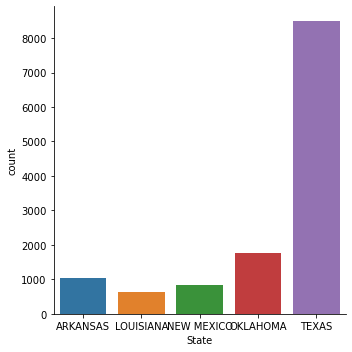

In [11]:
sns.catplot(x="State", y="count", kind='bar', data=school_per_state_2016)

# Data will be organized by Year and State with features total_students and reduced_price to predict title_I

### normalize total_students and number of students on reduced_price lunch

In [12]:
realcols = ["total_students","reduced_price"]
for k,_df in dates_df.items():
    for col in realcols:
      mean = _df[col].mean()
      std = _df[col].std()
      _df[col] = (_df[col]-mean)/std

/var/folders/dn/nlpq3v4d16bfx1zn4cyx92j40000gn/T/ipykernel_7788/191480175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df[col] = (_df[col]-mean)/std


### Correlation plots

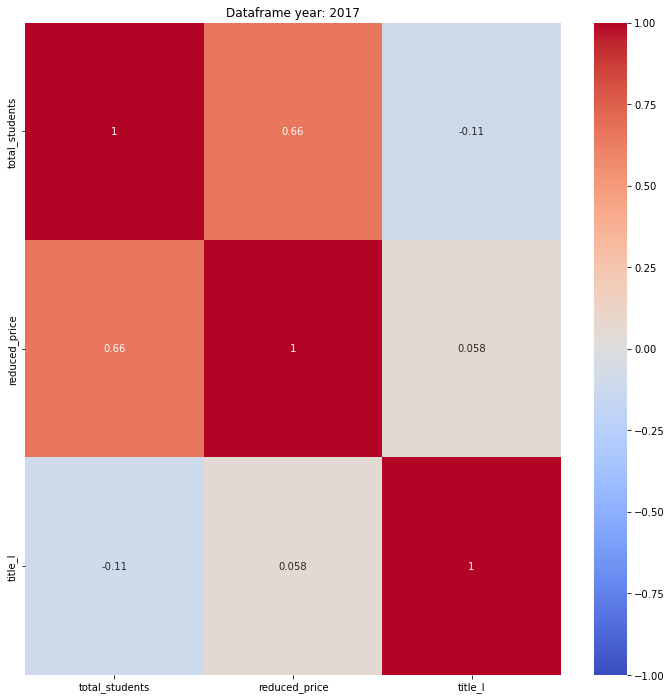

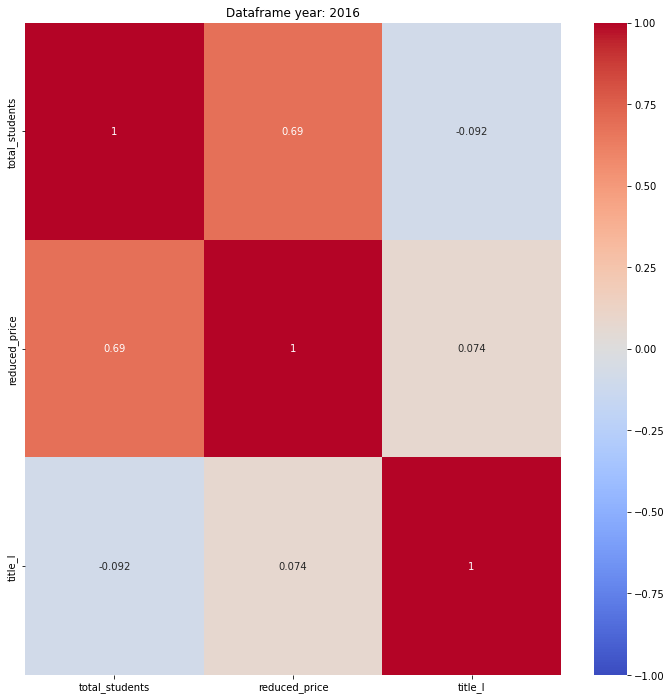

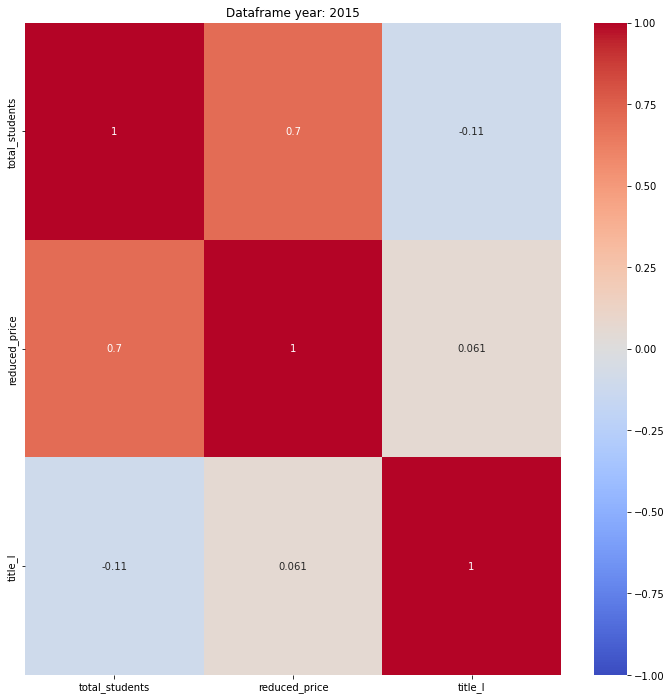

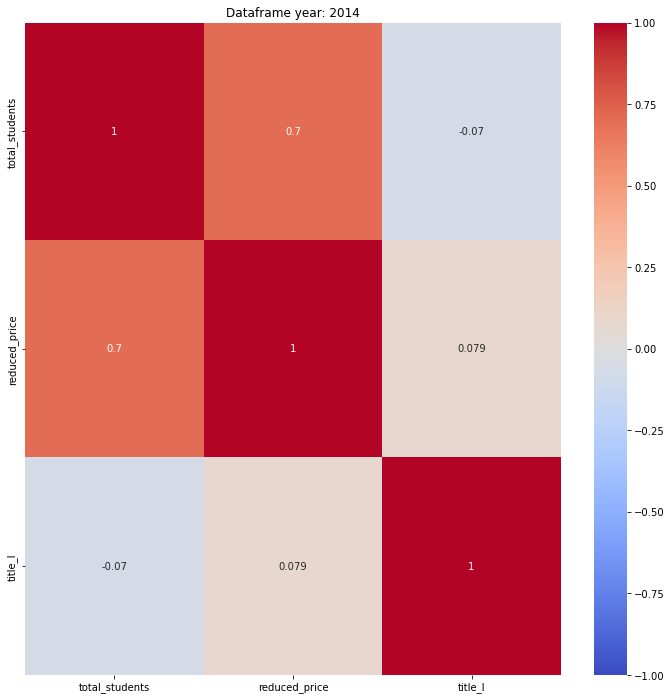

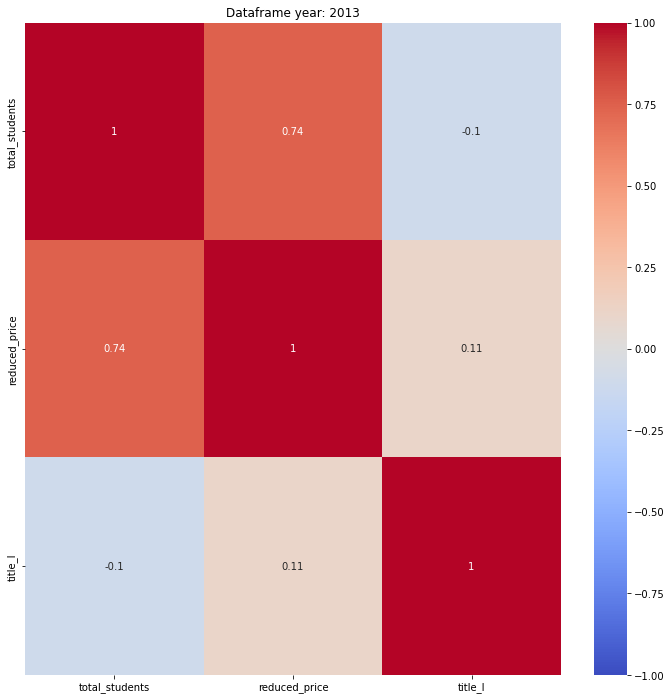

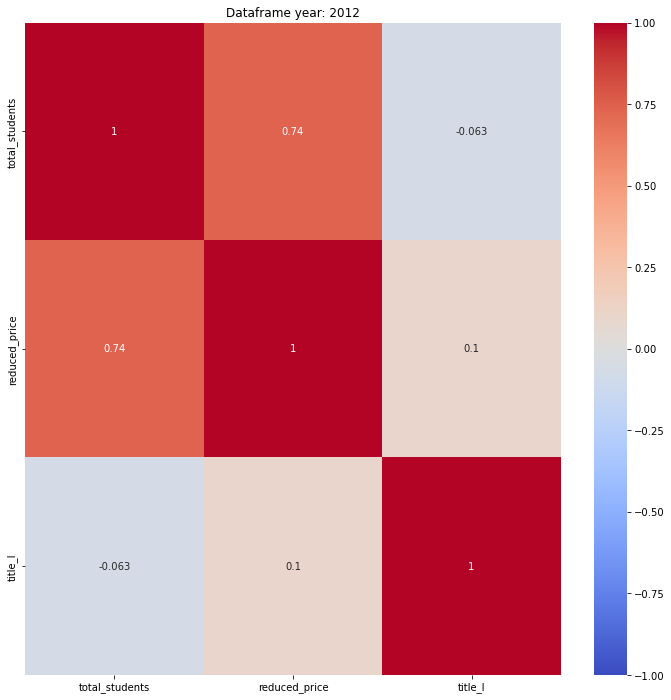

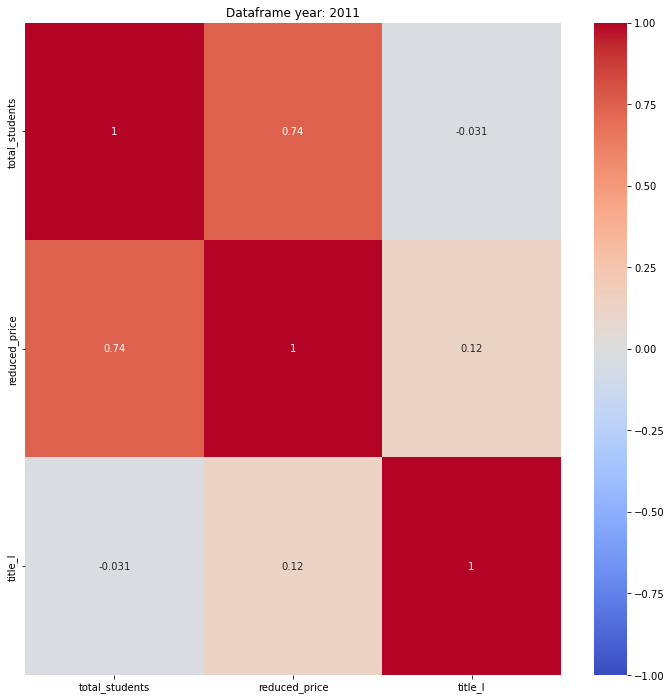

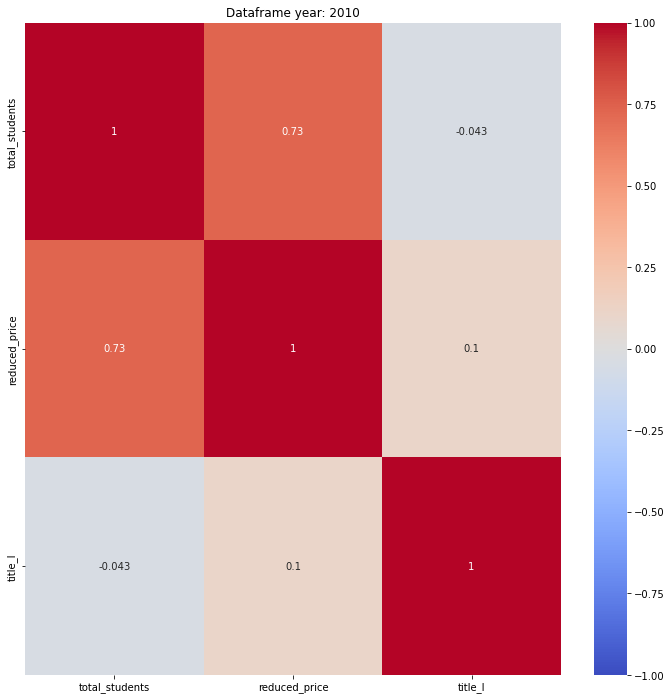

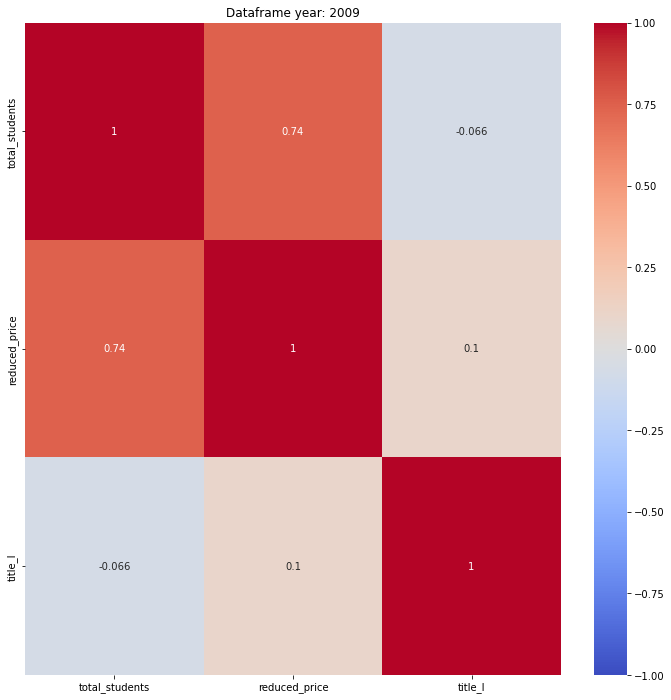

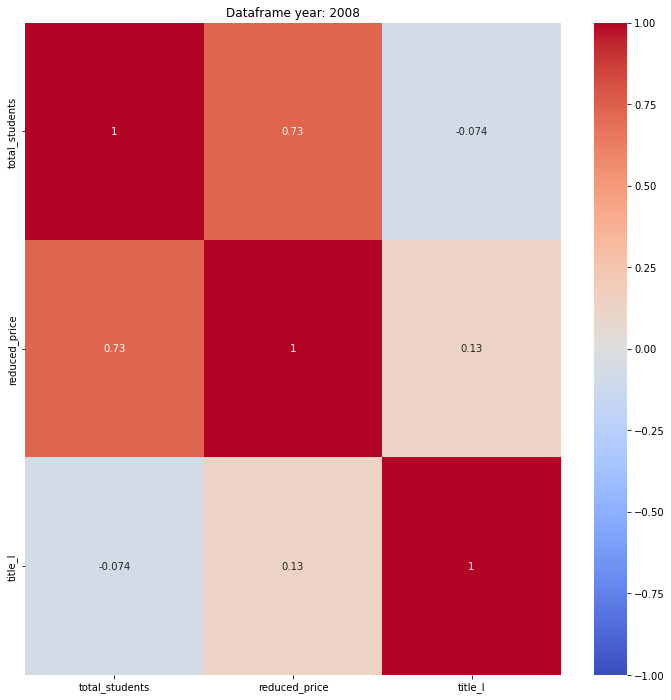

In [13]:
for k,_df in dates_df.items():
    plt.figure(figsize=(12,12))
    sns.heatmap(_df.corr(),annot=True,cmap='coolwarm',vmin=-1).set_title(f'Dataframe year: {k}')

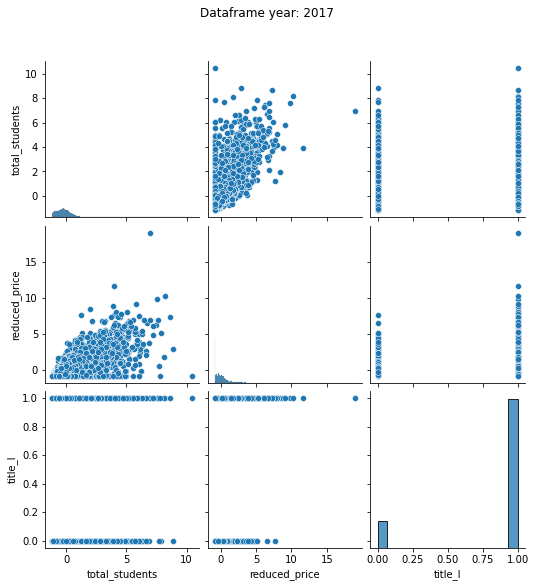

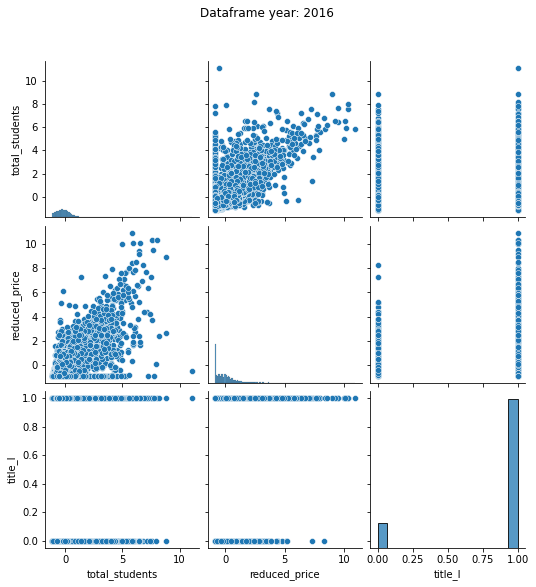

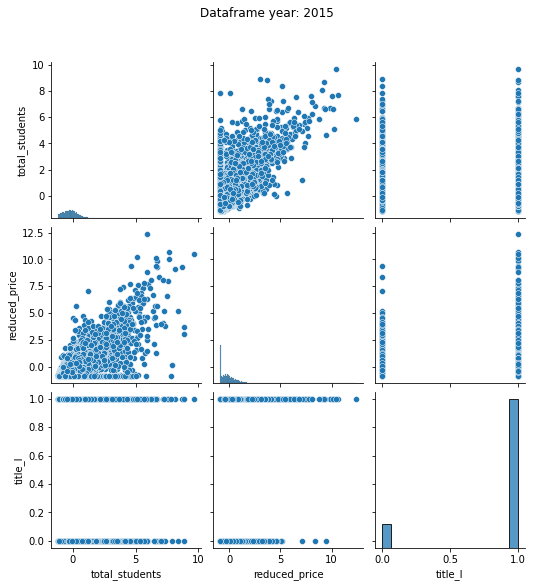

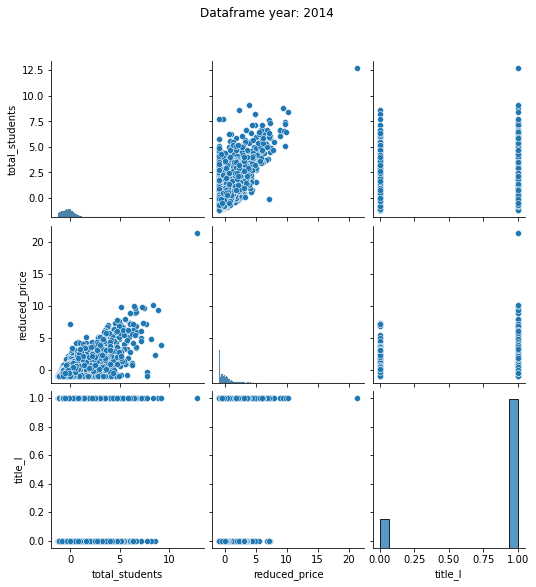

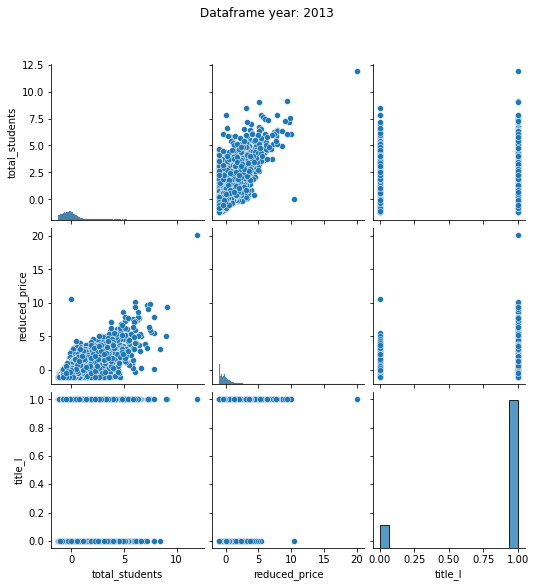

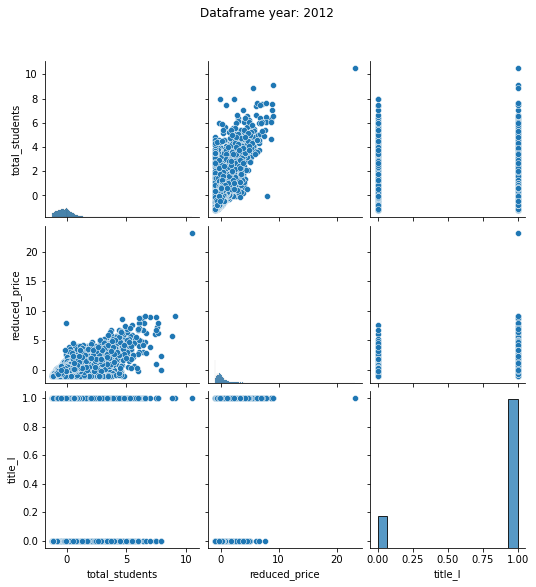

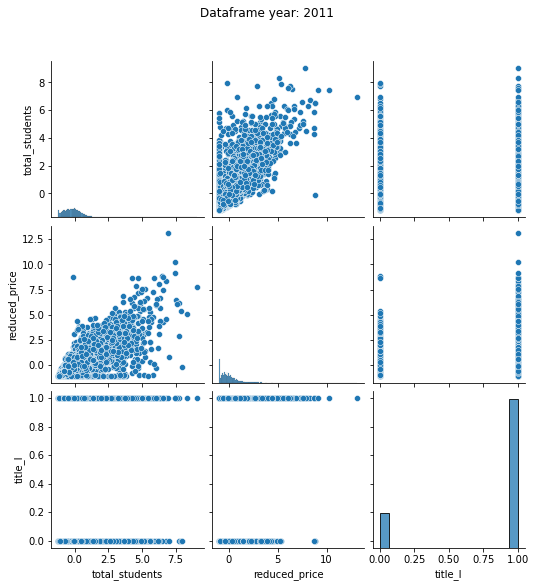

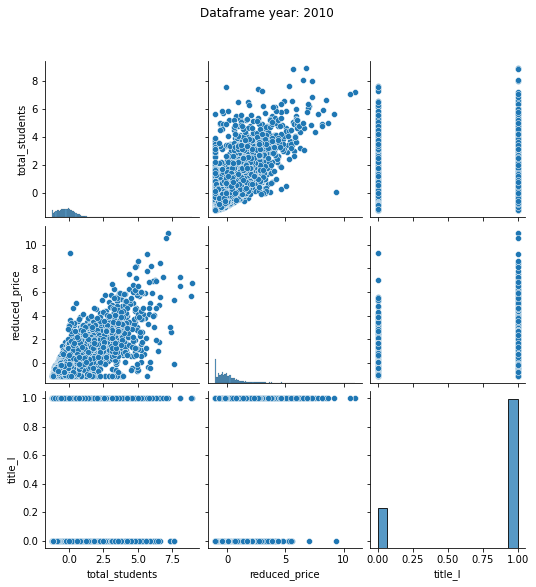

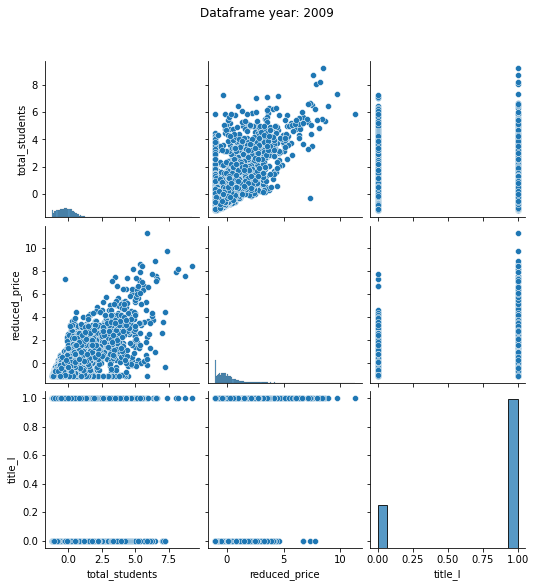

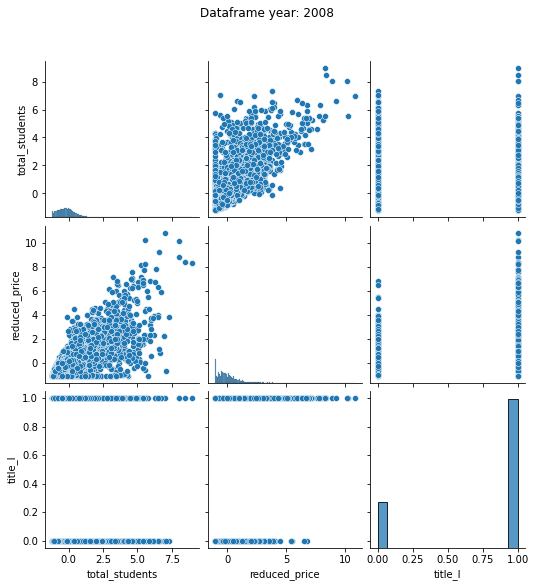

In [14]:
for k,_df in dates_df.items():
    p = sns.pairplot(_df)
    p.fig.suptitle(f'Dataframe year: {k}', y=1.08)


### Export formatted data to csvs

In [15]:
for k,_df in dates_df.items():
    _df.to_csv(f'./data/{k}_school_data.csv', index=False)